<a href="https://colab.research.google.com/github/vigneshvungarala/sales_Analyzer/blob/main/Sales_Data_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving large_sales_data.csv to large_sales_data.csv


## Loading the data

In [12]:
import pandas as pd
sales_data=pd.read_csv("large_sales_data.csv")
sales_data.head()

,Order_ID,Product,Region,Sales_Rep,Quantity,Unit_Price,Total_Sales,Order_Date,Payment_Method,Status
0,1001,Mouse,West,Frank,4,1111.79,4447.16,2023-12-18,PayPal,Pending
1,1002,Headphones,East,Alice,10,448.70,4487.00,2023-08-25,Debit Card,Pending
2,1003,Printer,East,Charlie,7,547.85,3834.95,2023-07-13,PayPal,Cancelled
3,1004,Monitor,East,NaN,1,626.60,626.60,2023-10-14,Debit Card,Cancelled
4,1005,Mouse,North,Alice,17,1207.91,20534.47,2023-09-16,NaN,Completed


In [13]:
sales_data.describe()

,Order_ID,Quantity,Unit_Price,Total_Sales
count,1030.000000,1030.000000,1030.000000,1030.000000
mean,1502.558252,12.412621,1106.043534,10357.260845
std,288.874650,27.873092,847.677304,8260.887306
min,1001.000000,1.000000,53.940000,135.880000
25%,1252.250000,5.000000,582.295000,3548.095000
50%,1502.500000,10.000000,1069.755000,7971.715000
75%,1752.750000,15.000000,1528.965000,15982.700000
max,2000.000000,482.000000,9834.930000,37381.550000


In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        1030 non-null   int64  
 1   Product         1030 non-null   object 
 2   Region          979 non-null    object 
 3   Sales_Rep       979 non-null    object 
 4   Quantity        1030 non-null   int64  
 5   Unit_Price      1030 non-null   float64
 6   Total_Sales     1030 non-null   float64
 7   Order_Date      1030 non-null   object 
 8   Payment_Method  977 non-null    object 
 9   Status          1030 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 80.6+ KB


## Data Cleaning

In [17]:
sales_data.isna().sum() #check for missing values

,0
Order_ID,0
Product,0
Region,50
Sales_Rep,50
Quantity,0
Unit_Price,0
Total_Sales,0
Order_Date,0
Payment_Method,50
Status,0


In [19]:
sales_data.drop_duplicates(inplace=True) #removing duplicates

In [22]:
sales_data['Order_Date']=pd.to_datetime(sales_data['Order_Date'],errors='coerce') # Convert 'date' column to datetime format
sales_data['Order_Date'] = sales_data['Order_Date'].ffill()     #here there is no null value in our date column
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        1000 non-null   int64         
 1   Product         1000 non-null   object        
 2   Region          1000 non-null   object        
 3   Sales_Rep       1000 non-null   object        
 4   Quantity        1000 non-null   int64         
 5   Unit_Price      1000 non-null   float64       
 6   Total_Sales     1000 non-null   float64       
 7   Order_Date      1000 non-null   datetime64[ns]
 8   Payment_Method  1000 non-null   object        
 9   Status          1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 85.9+ KB


In [23]:
# fill missing values with ffill method
sales_data.fillna(sales_data.ffill(), inplace=True)
# Check for missing values after filling
print(sales_data.isnull().sum())

Order_ID          0
Product           0
Region            0
Sales_Rep         0
Quantity          0
Unit_Price        0
Total_Sales       0
Order_Date        0
Payment_Method    0
Status            0
dtype: int64


In [25]:
sales_data.head(10)


,Order_ID,Product,Region,Sales_Rep,Quantity,Unit_Price,Total_Sales,Order_Date,Payment_Method,Status
0,1001,Mouse,West,Frank,4,1111.79,4447.16,2023-12-18,PayPal,Pending
1,1002,Headphones,East,Alice,10,448.70,4487.00,2023-08-25,Debit Card,Pending
2,1003,Printer,East,Charlie,7,547.85,3834.95,2023-07-13,PayPal,Cancelled
3,1004,Monitor,East,Charlie,1,626.60,626.60,2023-10-14,Debit Card,Cancelled
4,1005,Mouse,North,Alice,17,1207.91,20534.47,2023-09-16,Debit Card,Completed
5,1006,Tablet,North,David,2,113.98,227.96,2023-09-03,Bank Transfer,Cancelled
6,1007,Mouse,South,Bob,11,1290.28,14193.08,2023-05-16,Cash,Completed
7,1008,Printer,North,Charlie,9,760.49,6844.41,2023-10-07,PayPal,Pending
8,1009,Monitor,East,Eva,7,625.72,4380.04,2023-09-28,PayPal,Cancelled
9,1010,Headphones,North,Eva,17,1765.02,30005.34,2023-06-20,Bank Transfer,Cancelled



Summary Statistics:
           Order_ID     Quantity   Unit_Price   Total_Sales  \
count  1000.000000  1000.000000  1000.000000   1000.000000   
mean   1500.500000    12.436000  1104.762640  10277.585870   
min    1001.000000     1.000000    53.940000    135.880000   
25%    1250.750000     5.000000   579.392500   3489.240000   
50%    1500.500000    10.000000  1067.465000   7781.025000   
75%    1750.250000    15.000000  1529.355000  15865.597500   
max    2000.000000   482.000000  9834.930000  37381.550000   
std     288.819436    28.274571   856.379437   8280.049289   

                       Order_Date  
count                        1000  
mean   2023-07-02 02:47:02.400000  
min           2023-01-01 00:00:00  
25%           2023-04-05 00:00:00  
50%           2023-06-30 12:00:00  
75%           2023-10-02 06:00:00  
max           2023-12-31 00:00:00  
std                           NaN  

Unique values in Product:
 Product
Laptop        136
Tablet        122
Monitor       116
Print

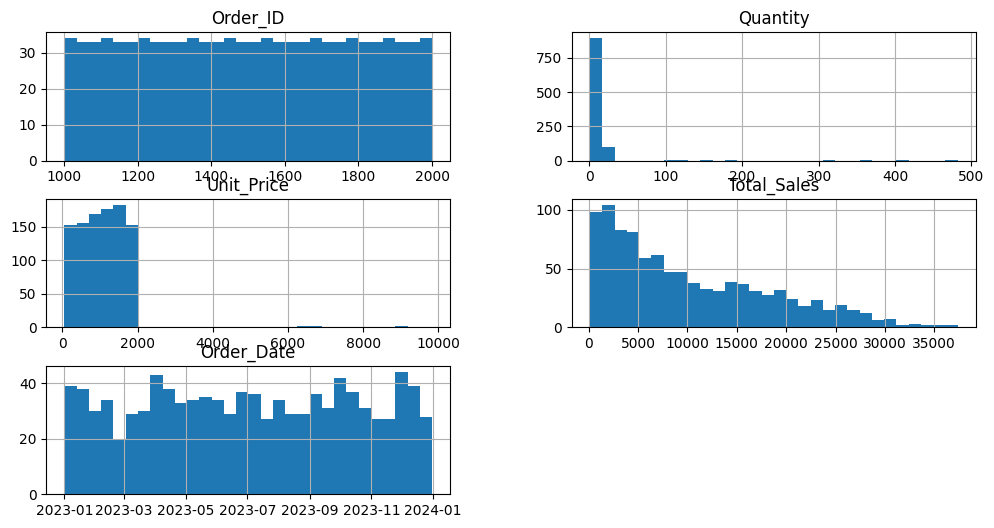

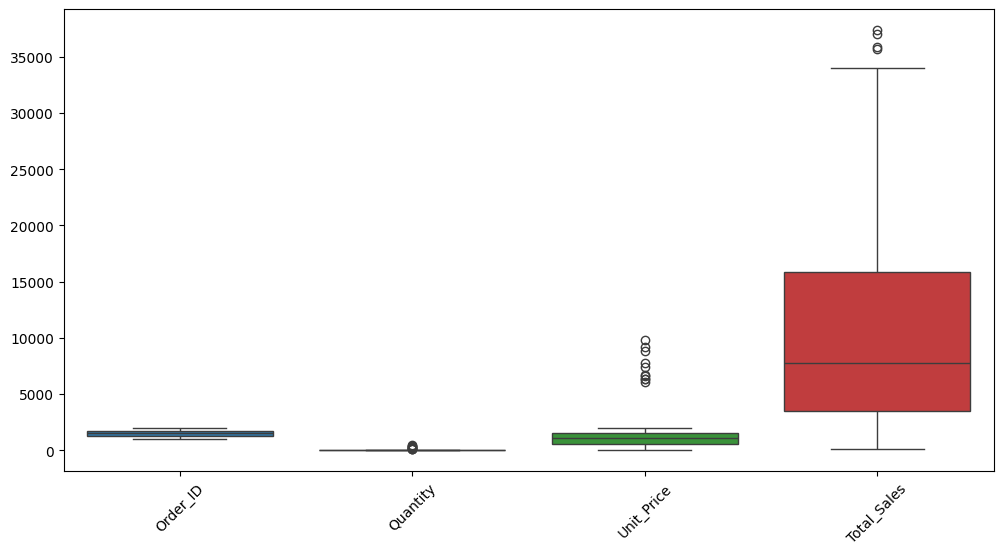

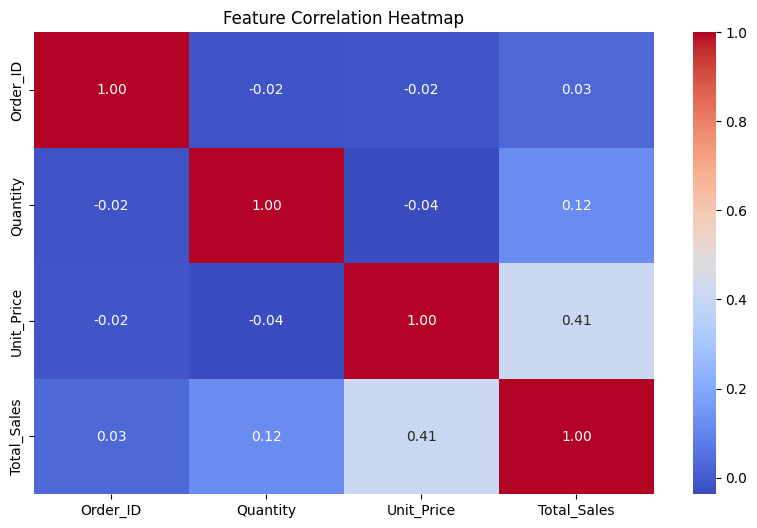

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSummary Statistics:\n", sales_data.describe())

categorical_cols = sales_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", sales_data[col].value_counts())

sales_data.hist(figsize=(12, 6), bins=30)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sales_data.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(sales_data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



In [30]:
import openpyxl
from openpyxl.chart import BarChart, Reference
import pandas as pd

# Create Summary Data
summary = {
    "Metric": ["Total Sales", "Best-Selling Product", "Worst-Selling Product", "Top Region"],
    "Value": [
        sales_data["Total_Sales"].sum(),
        sales_data.groupby("Product")["Total_Sales"].sum().idxmax(),
        sales_data.groupby("Product")["Total_Sales"].sum().idxmin(),
        sales_data.groupby("Region")["Total_Sales"].sum().idxmax()
    ]
}
summary_df = pd.DataFrame(summary)
# Export Summary to CSV
summary_df.to_csv("Sales_Summary_Report.csv", index=False)

# Create an Excel File with Charts
excel_file = "Sales_Report.xlsx"
writer = pd.ExcelWriter(excel_file, engine="openpyxl")
sales_data.to_excel(writer, sheet_name="Raw Data", index=False)
summary_df.to_excel(writer, sheet_name="Summary", index=False)

# Add Charts in Excel
wb = writer.book
ws = wb["Summary"]
chart = BarChart()
data = Reference(ws, min_col=2, min_row=1, max_row=5)
chart.add_data(data, titles_from_data=True)
chart.title = "Sales Insights"
ws.add_chart(chart, "E2")

# Save Excel File
writer.close()

# Generate Insights Text Report
insights = f"""
🔹 Total Sales: {sales_data['Total_Sales'].sum()}
🔹 Best-Selling Product: {sales_data.groupby('Product')['Total_Sales'].sum().idxmax()}
🔹 Worst-Selling Product: {sales_data.groupby('Product')['Total_Sales'].sum().idxmin()}
🔹 Top Region: {sales_data.groupby('Region')['Total_Sales'].sum().idxmax()}
"""
with open("Sales_Insights.txt", "w") as file:
    file.write(insights)

print("Reports Generated Successfully!")



Reports Generated Successfully!
